Laura Rodriguez 16-10-24

# Tarea - Caminata aleatoria y simulación montecarlo

#### 1. Simulación del movimiento browniano

El movimiento browniano es el movimiento aleatorio que se observa en las partículas que se hallan en un medio fluido, como resultado de choques contra las moléculas de dicho fluido [(referencia)].

[(referencia)]: https://es.wikipedia.org/wiki/Movimiento_browniano

Para simular el movimiento, en lugar de usar las ecuaciones integro-diferenciales que describe Einstein, use una caminta aleatoria para los tres ejes $x$, $y$, $z$ de la siguiente forma
$$
W_i=W_{i-1}+X_i\sqrt{\Delta t}
$$
donde, $\Delta t$ es un intervalo de tiempo y
$$
X_i=\left\{\begin{array}{l}
1\\
-1
\end{array}\right.,
$$
se escoge de forma aleatoria con la misma probabilidad.

Simule $10$ segundos con un $\Delta t=0.001$ y represéntelo en un gráfico 3D.

Dado el valor del intervalo de tiempo, se pueden definir las ecuaciones para cada uno de los ejes de la siguiente manera:

$$
W_x=W_{x-1}+X_i\sqrt{0.001}
$$
$$
W_y=W_{y-1}+Y_i\sqrt{0.001}
$$
$$
W_z=W_{z-1}+Z_i\sqrt{0.001}
$$

Donde $W_i$ representa el valor actual de la posición del cacminante y cada una de las variables de los ejes ($X_i,Y_i,Z_i$) pueden valer $1$ o $-1$ con la misma probabilidad.

Además, ya que se simularán $10$ segundos y cada paso tarda $0.001$ s en suceder, se deben simular $10,000$ pasos.

___

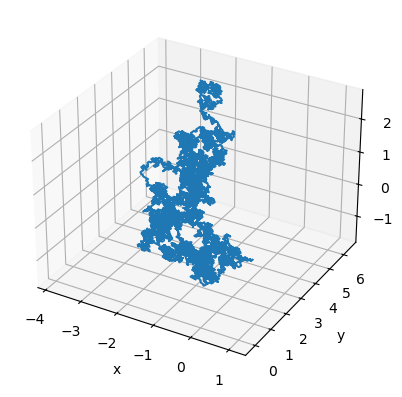

In [24]:
import numpy as np
import matplotlib.pyplot as plt
# Inicialización de variables
a = [-1,1]      # Dirección del paso

# Definición de funciones
def randWalk(n):
  Caminata = [0]
  for paso in range(n):
    Caminata.append(Caminata[-1]+np.random.choice(a)*np.sqrt(0.001))
  return Caminata


fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
x = randWalk(10000)
y = randWalk(10000)
z = randWalk(10000)

# Graficación de la caminata
ax.plot(x,y,z)

# Visualización de la figura
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.grid()

Así pues es como se ve la difusión aleatoria de una molécula en un medio fluido a causa del movimiento Browniano.

A continuación se visualiza la difusión aleatoria de 10 moléculas.

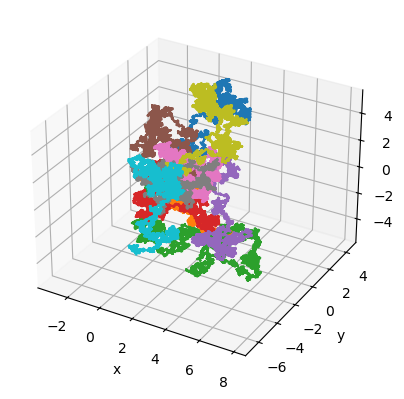

In [11]:
# Inizialización de la figura
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

for m in range(10):
  # Definicion aleatoria de las posiciones
  x = randWalk(10000)
  y = randWalk(10000)
  z = randWalk(10000)

  # Graficación de la caminata
  ax.plot(x,y,z)

# Visualización de la figura
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.grid()

#### 2. Apuesta arriesgada

Un jugador, con 20 pesos de capital inicial, decide apostar a un volado (con una moneda perfectamente nivelada) la mitad de su capital si éste es mayor o igual a 6 pesos, de lo contrario, solo 2. Esto es, el capital $C_i$ en cada volado $V_i$ se describe como
$$
C_{i+1}=C_i+V_iA_i
$$
donde la apuesta es
$$
A_i=\left\{\begin{array}{l}
C_i/2,\quad \mbox{si }C_i\geq 6\\
2,\quad \mbox{de lo contrario.}
\end{array}\right.
$$

1. Grafique la evolución del capital hasta quedar en cero.
2. Determine el número de volados promedio para quedar en quiebra usando la simulación montecarlo para 10,000 apostadores.
3. Muestre un histograma del número de volados.

El valor de $V_i$ no determinará la cara de la moneda, más bien será un indicador de si el jugador ganó o no la apuesta y, por lo tanto si debe sumar o restar la cantidad apostada a su capital actual. De este modo dicha variable puede tomar los valores de $1$ o $-1$ con la misma probabilidad.

Además, la variable $A_i$ dependerá de valor actual de capital del jugador, por lo tanto, el estado de su capital ($C_i$) debe irse almacenando en un arreglo, de modo que siempre se pueda conocer el último valor y que al final se pueda graficar la trayectoria que describió el cacpital del jugador antes de llegar a cero.

___

In [26]:
import numpy as np
import matplotlib.pyplot as plt


def Toss():
  win = np.random.randint(1,101)
  return (win<=100)&(win>=51)

def Play(C_0,A):
  """
**Play: Función de juego**

Esta función ejecutará un turno de juego de modo que
se determinará si ganó o perdió al lanzar la moneda `Toss()`
y, por ende, cuál será su nuevo capital.

*Parámetros:*

C_0 - Capital actual del jugador.
A   - Capital apostado.

*Retornos:*

C   - Nuevo capital del jugador.

"""
  C = C_0

  if Toss():
    C += A
  else:
    C -= A

  return C

def Declive(C_0):
  '''
**Declive: Función de caminata aleatoria decayente**

Esta función registra el declive del capital de un apostador
en un juego de "volado" donde siempre que su capital sea
mayor que $6, se apostará la mitad de este. Para otros casos
se apostarán exactamente $2. Las apuestas terminarán cuando
y solo cuando su capital sea menor o igual a cero.

*Parámetros:*

C_0   -   Capital inicial del jugador.

*Retornos:*

Hist  -   Historial del capital del jugador antes y después
          de cada apuesta.

  '''
  Hist = [C_0]

  while Hist[-1]>0:

    if Hist[-1] >= 6:
      A = Hist[-1]/2
    else:
      A = 2

    Hist.append(Play(Hist[-1],A))

  return Hist

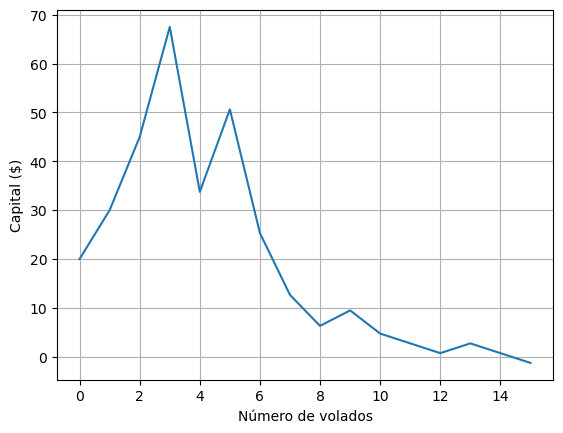

In [28]:
# Graficación de una corrida
plt.plot(Declive(20))

# Visualización de las figuras
plt.xlabel('Número de volados')
plt.ylabel('Capital ($)')
plt.grid()

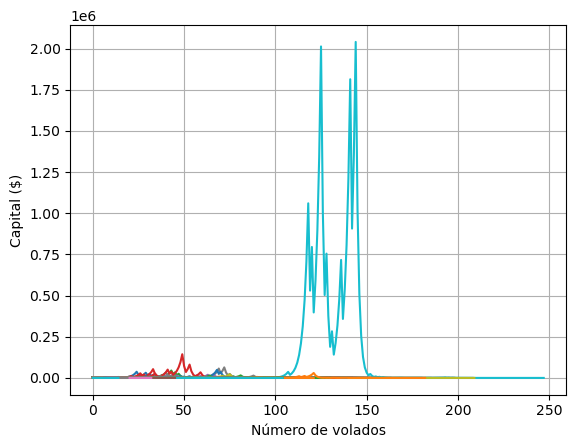

In [30]:
# Simulación de 10,000 corrida
N_Tiradas = []
for i in range(10000):
  Corrida = Declive(20)
  N_Tiradas.append(len(Corrida))
  plt.plot(Corrida)

# Visualización de las figuras
plt.xlabel('Número de volados')
plt.ylabel('Capital ($)')
plt.grid()

In [32]:
# Media de volados necesarios para perder el capital
np.mean(N_Tiradas)

27.1675

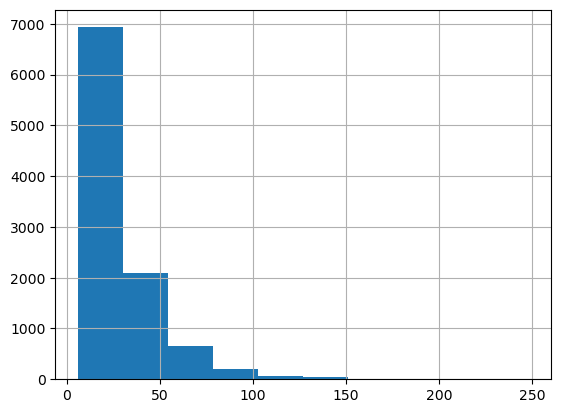

In [34]:
plt.hist(N_Tiradas)
plt.grid()

De esta manera se corrobora que, en promedio y suponiendo que ningún apostador parará hasta no quedarse sin dinero, toma entre $0$ y $50$ "volados" perder todo el capital, siendo que más de la mitad de los apostadores perdieron quedaron "en ceros" en ese rango de juegos.

___